In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_val,y_val)=cifar10.load_data()

In [3]:
y_train_flattened = y_train.flatten()

In [4]:
unique=set(y_train_flattened)
print(unique)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


[]

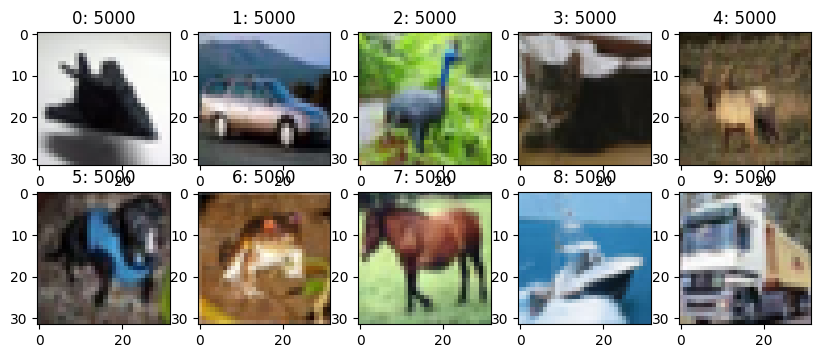

In [5]:
plt.figure(figsize=(10,10))
i=1
for label in unique:
  image=X_train[y_train_flattened.tolist().index(label)]
  plt.subplot(5,5,i)
  plt.axis='off'
  i=i+1
  plt.title(f"{label}: {y_train_flattened.tolist().count(label)}")
  _=plt.imshow(image)
plt.plot()



In [6]:
print(X_val)
print(y_val)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [7]:
X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

In [8]:
print(X_val)

[[[[0.61960787 0.4392157  0.19215687]
   [0.62352943 0.43529412 0.18431373]
   [0.64705884 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254903 0.14117648]
   [0.49411765 0.35686275 0.14117648]
   [0.45490196 0.33333334 0.12941177]]

  [[0.59607846 0.4392157  0.2       ]
   [0.5921569  0.43137255 0.15686275]
   [0.62352943 0.44705883 0.1764706 ]
   ...
   [0.53333336 0.37254903 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509805 0.13333334]]

  [[0.5921569  0.43137255 0.18431373]
   [0.5921569  0.42745098 0.12941177]
   [0.61960787 0.43529412 0.14117648]
   ...
   [0.54509807 0.38431373 0.13333334]
   [0.50980395 0.37254903 0.13333334]
   [0.47058824 0.34901962 0.12941177]]

  ...

  [[0.26666668 0.4862745  0.69411767]
   [0.16470589 0.39215687 0.5803922 ]
   [0.12156863 0.34509805 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254905]
   [0.05098039 0.2509804  0.42352942]
   [0.15686275 0.33333334 0.49803922]]

  [[0.23921569 0.45490196 0.65882355]
   [0.1

In [9]:
n=10
y_train=to_categorical(y_train,n)
y_val=to_categorical(y_val,n)
print(y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [10]:
X_train = np.reshape(X_train, (50000, 32 * 32 * 3))
X_val = np.reshape(X_val, (10000, 32 * 32 * 3))
X_train.shape

(50000, 3072)

In [12]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [13]:
n_epochs = 10
batch_size = 1000
validation_split = 0.2
history_sigmoid = history_loss()

In [28]:
model_selu = Sequential()
model_selu.add(Dense(1500, input_dim=3072, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(1500, activation='selu'))
model_selu.add(Dense(900, activation='selu'))
model_selu.add(Dense(200, activation='selu'))
model_selu.add(Dense(10, activation='softmax'))

In [29]:
model_selu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history_selu = history_loss()
model_selu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
callbacks=[history_selu],
validation_split=validation_split, verbose=2)

Epoch 1/10
40/40 - 19s - 481ms/step - accuracy: 0.1012 - loss: 18.0721 - val_accuracy: 0.0998 - val_loss: 2.7363
Epoch 2/10
40/40 - 17s - 424ms/step - accuracy: 0.1242 - loss: 2.3583 - val_accuracy: 0.1273 - val_loss: 2.2763
Epoch 3/10
40/40 - 17s - 423ms/step - accuracy: 0.1524 - loss: 2.2451 - val_accuracy: 0.1583 - val_loss: 2.1862
Epoch 4/10
40/40 - 17s - 423ms/step - accuracy: 0.1778 - loss: 2.1489 - val_accuracy: 0.1813 - val_loss: 2.0933
Epoch 5/10
40/40 - 17s - 421ms/step - accuracy: 0.2006 - loss: 2.0733 - val_accuracy: 0.2113 - val_loss: 2.0758
Epoch 6/10
40/40 - 17s - 422ms/step - accuracy: 0.2215 - loss: 2.0481 - val_accuracy: 0.2439 - val_loss: 2.0039
Epoch 7/10
40/40 - 17s - 424ms/step - accuracy: 0.2473 - loss: 2.0043 - val_accuracy: 0.2106 - val_loss: 2.0816
Epoch 8/10
40/40 - 17s - 426ms/step - accuracy: 0.2594 - loss: 1.9836 - val_accuracy: 0.2770 - val_loss: 1.9411
Epoch 9/10
40/40 - 17s - 424ms/step - accuracy: 0.2901 - loss: 1.9186 - val_accuracy: 0.2823 - val_loss

In [31]:

w_selu = []
for i in range(len(model_selu.layers)):
    w_selu.append(max(model_selu.layers[i].get_weights()[1]))
print(w_selu)



[0.013274587, 0.012331079, 0.015062466, 0.016977906, 0.014850008, 0.013866587, 0.015840948, 0.004556026, 0.014536083]
